<a href="https://colab.research.google.com/github/boopathiboo/Deep_Learning/blob/master/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
    # Data abstraction 
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X, X_valid1, Y, y_vaild1 = train_test_split(X_train, y_train, test_size=0.2, random_state=1,stratify=y_train)


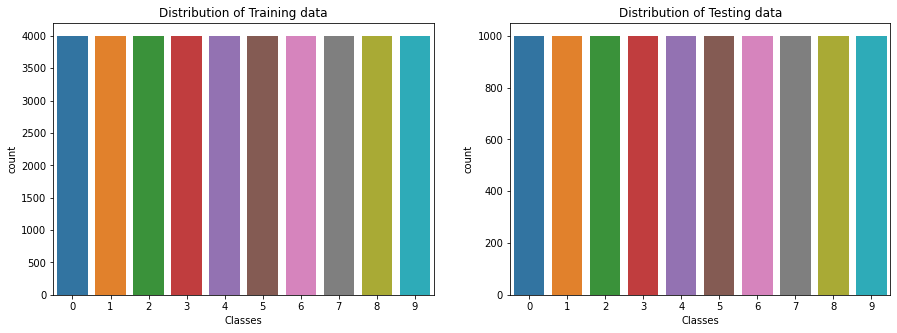

In [3]:
#Distribution analysis 
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(Y.ravel(), ax=axs[0])
axs[0].set_title('Distribution of Training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_vaild1.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [4]:
# Datasets shapes
print( "X train shape",X.shape)
print( "y train shape",Y.shape)
print( "x valid1 shape",X_valid1.shape)
print( "y valid1 shape",y_vaild1.shape)

X train shape (40000, 32, 32, 3)
y train shape (40000, 1)
x valid1 shape (10000, 32, 32, 3)
y valid1 shape (10000, 1)


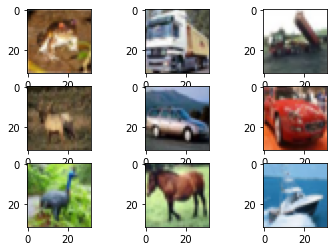

In [5]:
# plot first few images
for i in range(9):
# define subplot
   plt.subplot(330 + 1 + i)
# plot raw pixel data
   plt.imshow(X_train[i])
# show the figure
plt.show()

In [6]:
index = 2
X[index]

array([[[242, 245, 250],
        [239, 242, 247],
        [239, 242, 247],
        ...,
        [235, 238, 238],
        [238, 244, 244],
        [219, 222, 211]],

       [[244, 247, 252],
        [242, 245, 250],
        [241, 244, 249],
        ...,
        [240, 241, 242],
        [242, 248, 248],
        [221, 223, 212]],

       [[243, 246, 251],
        [241, 244, 249],
        [241, 244, 249],
        ...,
        [235, 243, 246],
        [243, 250, 250],
        [222, 224, 213]],

       ...,

       [[112, 116, 120],
        [ 42,  44,  45],
        [ 37,  38,  29],
        ...,
        [156, 158, 159],
        [180, 186, 185],
        [205, 205, 193]],

       [[227, 230, 229],
        [179, 181, 179],
        [156, 157, 148],
        ...,
        [148, 155, 151],
        [176, 179, 176],
        [206, 205, 189]],

       [[180, 182, 163],
        [176, 178, 160],
        [174, 175, 158],
        ...,
        [161, 165, 154],
        [171, 169, 160],
        [172, 168, 145]]

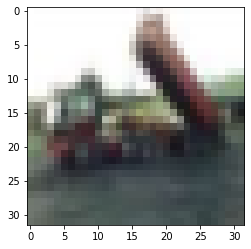

In [7]:
img = plt.imshow(X_train[index])

In [8]:
print('The image label is: ', y_train[index])

The image label is:  [9]


In [9]:
Label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
print('The image class is: ', Label[y_train[index][0]])

The image class is:  truck


In [11]:
#converting lable to one hot encoding  
from keras.utils import to_categorical
y_train_conv = to_categorical(Y)
y_valid1_conv= to_categorical(y_vaild1)   #input into the neural network

In [12]:
print(y_train_conv)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
print(y_train_conv[index])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
# Reshape #normalize the pixel value is between 0 to 1 (pixel value is 0 to 255)
X = X / 255
X_valid1 = X_valid1 / 255

X

array([[[[0.69019608, 0.64705882, 0.53333333],
         [0.69019608, 0.63921569, 0.5254902 ],
         [0.70980392, 0.65490196, 0.54117647],
         ...,
         [0.73333333, 0.70588235, 0.56470588],
         [0.70588235, 0.65490196, 0.52941176],
         [0.70980392, 0.64313725, 0.53333333]],

        [[0.69019608, 0.63529412, 0.52156863],
         [0.7254902 , 0.67058824, 0.55686275],
         [0.74509804, 0.69411765, 0.58039216],
         ...,
         [0.80784314, 0.71764706, 0.61568627],
         [0.76078431, 0.71372549, 0.60784314],
         [0.72941176, 0.70196078, 0.59215686]],

        [[0.65882353, 0.59607843, 0.50196078],
         [0.75294118, 0.69803922, 0.6       ],
         [0.77254902, 0.7254902 , 0.62745098],
         ...,
         [0.80392157, 0.67058824, 0.61568627],
         [0.76470588, 0.71764706, 0.64313725],
         [0.69019608, 0.69019608, 0.59607843]],

        ...,

        [[0.56470588, 0.59607843, 0.60784314],
         [0.58039216, 0.61176471, 0.62352941]

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',activation='relu', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [16]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:

hist = model.fit(X, y_train_conv, batch_size=128, epochs=10, validation_data=(X_valid1,y_valid1_conv))


In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(hist.history['accuracy']) 
    axs[0].plot(hist.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(hist.history['loss']) 
    axs[1].plot(hist.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(hist.history.keys())

plotmodelhistory(hist)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1,
            fill_mode='nearest',
            cval=0.,
            horizontal_flip=True
            )

In [20]:
datagen.fit(X)

In [21]:
hist = model.fit(X, y_train_conv, 
           batch_size=32, epochs=10, validation_data=(X_valid1,y_valid1_conv))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 10s 254us/step - loss: 1.5490 - accuracy: 0.4297 - val_loss: 1.1826 - val_accuracy: 0.5732
Epoch 2/10
40000/40000 [==============================] - 9s 217us/step - loss: 1.1700 - accuracy: 0.5802 - val_loss: 1.0241 - val_accuracy: 0.6350
Epoch 3/10
40000/40000 [==============================] - 9s 217us/step - loss: 1.0224 - accuracy: 0.6382 - val_loss: 0.9253 - val_accuracy: 0.6711
Epoch 4/10
40000/40000 [==============================] - 9s 217us/step - loss: 0.9268 - accuracy: 0.6771 - val_loss: 0.8577 - val_accuracy: 0.6958
Epoch 5/10
40000/40000 [==============================] - 9s 219us/step - loss: 0.8518 - accuracy: 0.6992 - val_loss: 0.8073 - val_accuracy: 0.7130
Epoch 6/10
40000/40000 [==============================] - 9s 217us/step - loss: 0.7986 - accuracy: 0.7195 - val_loss: 0.7573 - val_accuracy: 0.7343
Epoch 7/10
40000/40000 [==============================] - 9s 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


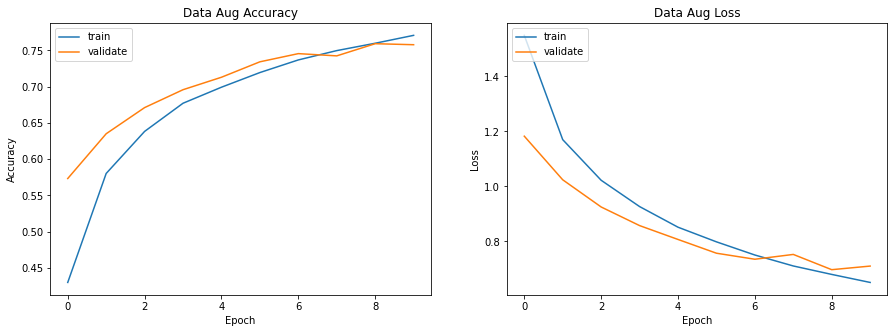

In [22]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(hist.history['accuracy']) 
    axs[0].plot(hist.history['val_accuracy']) 
    axs[0].set_title('Data Aug Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(hist.history['loss']) 
    axs[1].plot(hist.history['val_loss']) 
    axs[1].set_title('Data Aug Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(hist.history.keys())

plotmodelhistory(hist)

In [ ]:

scores = model.evaluate(X_valid1, y_valid1_conv)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])